<a href="https://colab.research.google.com/github/Fuad-Khan/Religious-Harassment-Models/blob/main/3class_Riligious_Deep_Learning_Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# LSTM Model

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_21"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_21 (Embedding)        │ (None, 100, 128)       │     1,536,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_19 (LSTM)                  │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_21 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_42 (Dense)                │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_43 (Dense)                │ (None, 3)              │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,589,763 (6.06 MB)

 Trainable params: 1,589,763 (6.06 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/6
146/146 ━━━━━━━━━━━━━━━━━━━━ 37s 236ms/step - accuracy: 0.5016 - loss: 1.0370 - val_accuracy: 0.5430 - val_loss: 1.0462
Epoch 2/6
146/146 ━━━━━━━━━━━━━━━━━━━━ 32s 222ms/step - accuracy: 0.5329 - loss: 1.0201 - val_accuracy: 0.5405 - val_loss: 1.0027
Epoch 3/6
146/146 ━━━━━━━━━━━━━━━━━━━━ 41s 225ms/step - accuracy: 0.5300 - loss: 1.0071 - val_accuracy: 0.5405 - val_loss: 1.0002
Epoch 4/6
146/146 ━━━━━━━━━━━━━━━━━━━━ 32s 223ms/step - accuracy: 0.5351 - loss: 1.0043 - val_accuracy: 0.5434 - val_loss: 1.0003
Epoch 5/6
146/146 ━━━━━━━━━━━━━━━━━━━━ 41s 221ms/step - accuracy: 0.5708 - loss: 0.9474 - val_accuracy: 0.8248 - val_loss: 0.5120
Epoch 6/6
146/146 ━━━━━━━━━━━━━━━━━━━━ 34s 232ms/step - accuracy: 0.8565 - loss: 0.4049 - val_accuracy: 0.8919 - val_loss: 0.3137
162/162 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step

✅ Classification Report:
               precision    recall  f1-score   support

Not Religious       0.91      0.98      0.94      2649
    Religious       0.79      0.77      0

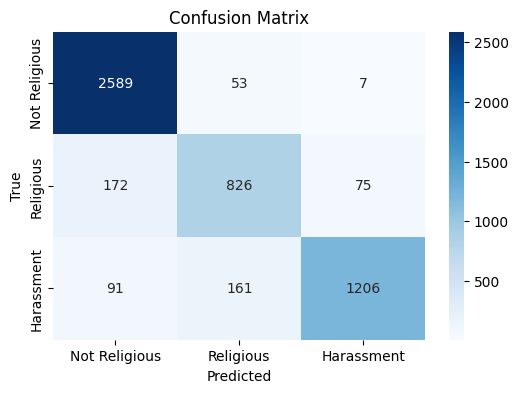

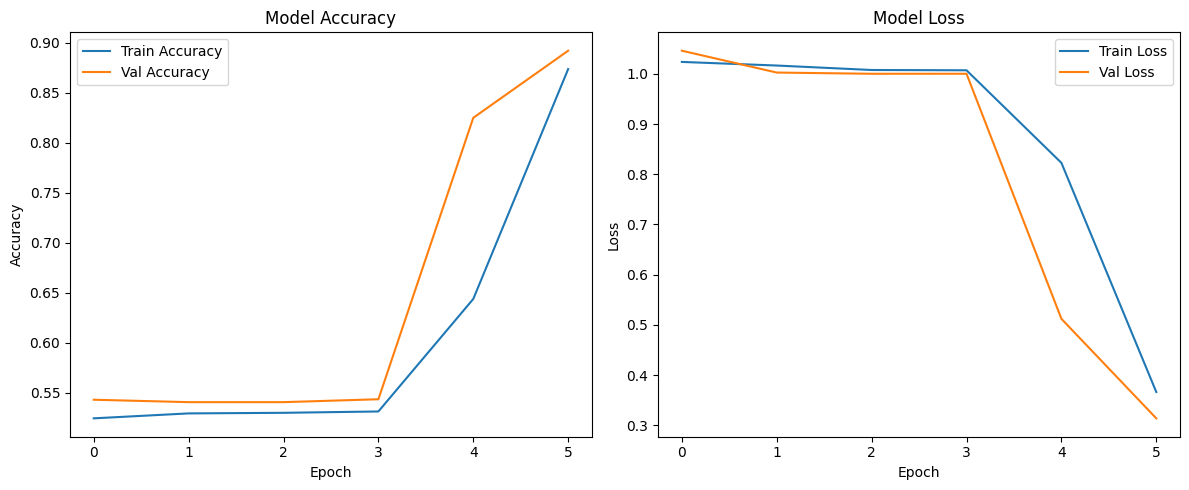

✅ Model saved as 'lstm_religious_model.h5'
✅ Tokenizer saved as 'lstm_tokenizer.pkl'


In [22]:
# ✅ 1. Install required packages (Uncomment if needed)
# !pip install -q tensorflow pandas scikit-learn

# ✅ 2. Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dropout, Dense
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
import pickle

# ✅ 3. Load Dataset
file_path = "/content/drive/MyDrive/Research Paper/Data Preprocessing/Cleaned_Labeled_Religious_Comments_Numeric_2.0.csv"
df = pd.read_csv(file_path)

# ✅ 4. Prepare Data
texts = df['comment'].astype(str).values
labels = df['label_numeric'].values  # 3 classes: 0, 1, 2
labels_cat = to_categorical(labels, num_classes=3)

# ✅ 5. Tokenization and Padding
vocab_size = 12000
max_length = 100
tokenizer = Tokenizer(num_words=vocab_size, oov_token='<OOV>')
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)
padded = pad_sequences(sequences, maxlen=max_length, padding='post')

# ✅ 6. Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(padded, labels_cat, test_size=0.2, random_state=42)

# ✅ 7. Build LSTM Model
model = Sequential([
    Embedding(vocab_size, 128, input_length=max_length),
    LSTM(64),
    Dropout(0.4),
    Dense(64, activation='relu'),
    Dense(3, activation='softmax')  # 3-class classification
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.build(input_shape=(None, max_length))
model.summary()

# ✅ 8. Train Model
history = model.fit(X_train, y_train, epochs=6, batch_size=128, validation_split=0.1)

# ✅ 9. Evaluate Model
y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = np.argmax(y_test, axis=1)

print("\n✅ Classification Report:")
print(classification_report(y_true, y_pred, target_names=['Not Religious', 'Religious', 'Harassment'], zero_division=0))

# ✅ 10. Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Not Religious', 'Religious', 'Harassment'],
            yticklabels=['Not Religious', 'Religious', 'Harassment'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# ✅ 11. Plot Accuracy & Loss
plt.figure(figsize=(12, 5))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

# ✅ 12. Save Model and Tokenizer
model.save('/content/drive/MyDrive/Research Paper/Models/Deep Learning Models/lstm_religious_model.h5')

with open('/content/drive/MyDrive/Research Paper/Models/Deep Learning Models/lstm_tokenizer.pkl', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

print("✅ Model saved as 'lstm_religious_model.h5'")
print("✅ Tokenizer saved as 'lstm_tokenizer.pkl'")


# CNN-LSTM model

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_11 (Embedding)        │ (None, 100, 128)       │     1,536,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 96, 64)         │        41,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_1 (MaxPooling1D)  │ (None, 48, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_10 (LSTM)                  │ (None, 64)             │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 3)              │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,614,403 (6.16 MB)

 Trainable params: 1,614,403 (6.16 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/6
146/146 ━━━━━━━━━━━━━━━━━━━━ 31s 191ms/step - accuracy: 0.5515 - loss: 0.9566 - val_accuracy: 0.8620 - val_loss: 0.4061
Epoch 2/6
146/146 ━━━━━━━━━━━━━━━━━━━━ 28s 191ms/step - accuracy: 0.8806 - loss: 0.3448 - val_accuracy: 0.8813 - val_loss: 0.3327
Epoch 3/6
146/146 ━━━━━━━━━━━━━━━━━━━━ 40s 187ms/step - accuracy: 0.9149 - loss: 0.2381 - val_accuracy: 0.8919 - val_loss: 0.3884
Epoch 4/6
146/146 ━━━━━━━━━━━━━━━━━━━━ 28s 189ms/step - accuracy: 0.9398 - loss: 0.1837 - val_accuracy: 0.8847 - val_loss: 0.3457
Epoch 5/6
146/146 ━━━━━━━━━━━━━━━━━━━━ 27s 185ms/step - accuracy: 0.9384 - loss: 0.2030 - val_accuracy: 0.8900 - val_loss: 0.4069
Epoch 6/6
146/146 ━━━━━━━━━━━━━━━━━━━━ 26s 181ms/step - accuracy: 0.9147 - loss: 0.2093 - val_accuracy: 0.8726 - val_loss: 0.3953
162/162 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step

Classification Report:

               precision    recall  f1-score   support

Not Religious       0.93      0.96      0.94      2649
    Religious       0.76      0.68      0.

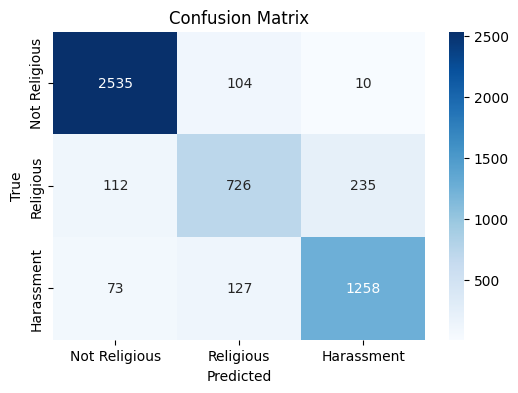

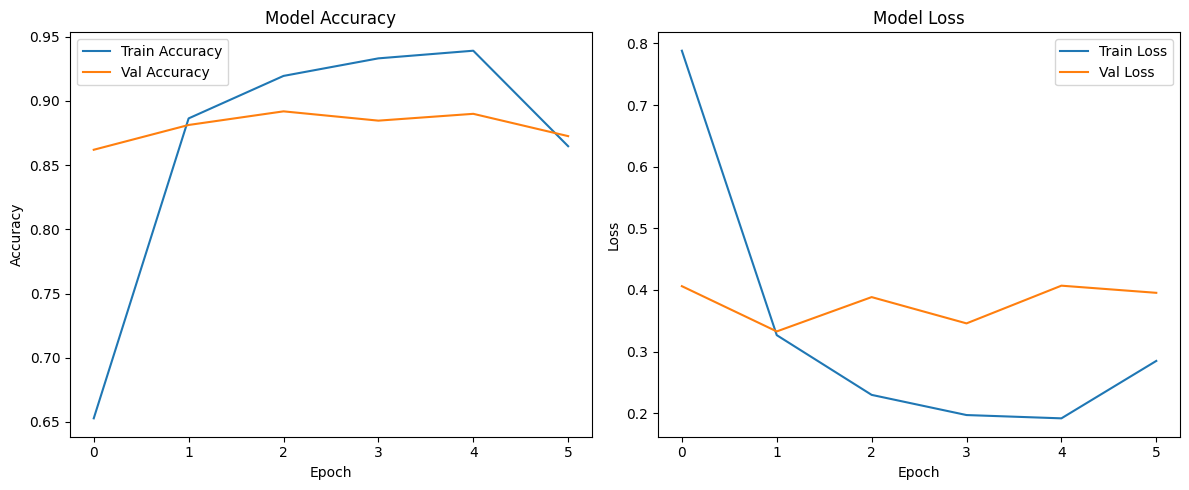

✅ Model saved as 'cnn-lstm_religious_model.h5'
✅ Tokenizer saved as 'cnn-lstm_tokenizer.pkl'


In [12]:

# 1. Install required packages
# !pip install -q tensorflow pandas scikit-learn

# 2. Import librariesfrom tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, MaxPooling1D, LSTM, Dropout, Dense
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

# ✅ Step 3: Load your dataset
file_path = "/content/drive/MyDrive/Research Paper/Data Preprocessing/Cleaned_Labeled_Religious_Comments_Numeric_2.0.csv"
df = pd.read_csv(file_path)

# ✅ Step 5: Preprocess data
texts = df['comment'].astype(str).values
labels = df['label_numeric'].values  # 3 classes: 0, 1, 2

# One-hot encode labels
from tensorflow.keras.utils import to_categorical
labels_cat = to_categorical(labels, num_classes=3)

# ✅ Step 6: Tokenize and pad text
vocab_size = 12000
max_length = 100

tokenizer = Tokenizer(num_words=vocab_size, oov_token='<OOV>')
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)
padded = pad_sequences(sequences, maxlen=max_length, padding='post')

# ✅ Step 7: Train/test split
X_train, X_test, y_train, y_test = train_test_split(padded, labels_cat, test_size=0.2, random_state=42)

# ✅ Step 8: CNN-LSTM model for multi-class
model = Sequential([
    Embedding(vocab_size, 128, input_length=max_length),
    Conv1D(64, kernel_size=5, activation='relu'),
    MaxPooling1D(pool_size=2),
    LSTM(64),
    Dropout(0.4),
    Dense(64, activation='relu'),
    Dense(3, activation='softmax')  # 3-class output
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.build(input_shape=(None, max_length))
model.summary()

# ✅ Step 9: Train the model
history = model.fit(X_train, y_train, epochs=6, batch_size=128, validation_split=0.1)

# ✅ Step 10: Evaluate the model
y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = np.argmax(y_test, axis=1)

print("\nClassification Report:\n")
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_true, y_pred, target_names=['Not Religious', 'Religious', 'Harassment']))

# ✅ Confusion matrix
import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Not Religious', 'Religious', 'Harassment'],
            yticklabels=['Not Religious', 'Religious', 'Harassment'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# ✅ Step 11: Plot training history
plt.figure(figsize=(12,5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

# ✅ Step 12: Save model and tokenizer
import pickle
model.save('/content/drive/MyDrive/Research Paper/Models/Deep Learning Models/cnn-lstm_religious_model.h5')

with open('/content/drive/MyDrive/Research Paper/Models/Deep Learning Models/cnn-lstm_tokenizer.pkl', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

print("✅ Model saved as 'cnn-lstm_religious_model.h5'")
print("✅ Tokenizer saved as 'cnn-lstm_tokenizer.pkl'")


#  Bi-LSTM

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_12 (Embedding)        │ (None, 100, 128)       │     1,536,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_1 (Bidirectional) │ (None, 128)            │        98,816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 3)              │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,643,267 (6.27 MB)

 Trainable params: 1,643,267 (6.27 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/6
146/146 ━━━━━━━━━━━━━━━━━━━━ 65s 413ms/step - accuracy: 0.6294 - loss: 0.8219 - val_accuracy: 0.8798 - val_loss: 0.3217
Epoch 2/6
146/146 ━━━━━━━━━━━━━━━━━━━━ 83s 424ms/step - accuracy: 0.9210 - loss: 0.2313 - val_accuracy: 0.9025 - val_loss: 0.2669
Epoch 3/6
146/146 ━━━━━━━━━━━━━━━━━━━━ 82s 423ms/step - accuracy: 0.9701 - loss: 0.1024 - val_accuracy: 0.9102 - val_loss: 0.2677
Epoch 4/6
146/146 ━━━━━━━━━━━━━━━━━━━━ 80s 409ms/step - accuracy: 0.9835 - loss: 0.0587 - val_accuracy: 0.9180 - val_loss: 0.2838
Epoch 5/6
146/146 ━━━━━━━━━━━━━━━━━━━━ 84s 423ms/step - accuracy: 0.9881 - loss: 0.0474 - val_accuracy: 0.9170 - val_loss: 0.3008
Epoch 6/6
146/146 ━━━━━━━━━━━━━━━━━━━━ 83s 431ms/step - accuracy: 0.9870 - loss: 0.0543 - val_accuracy: 0.9194 - val_loss: 0.3336
162/162 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step

Classification Report:

               precision    recall  f1-score   support

Not Religious       0.94      0.94      0.94      2649
    Religious       0.81      0.84      0.

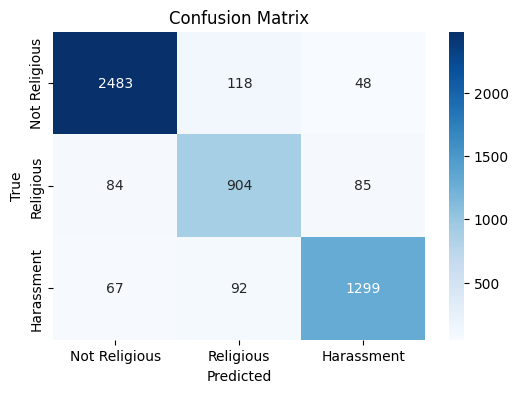

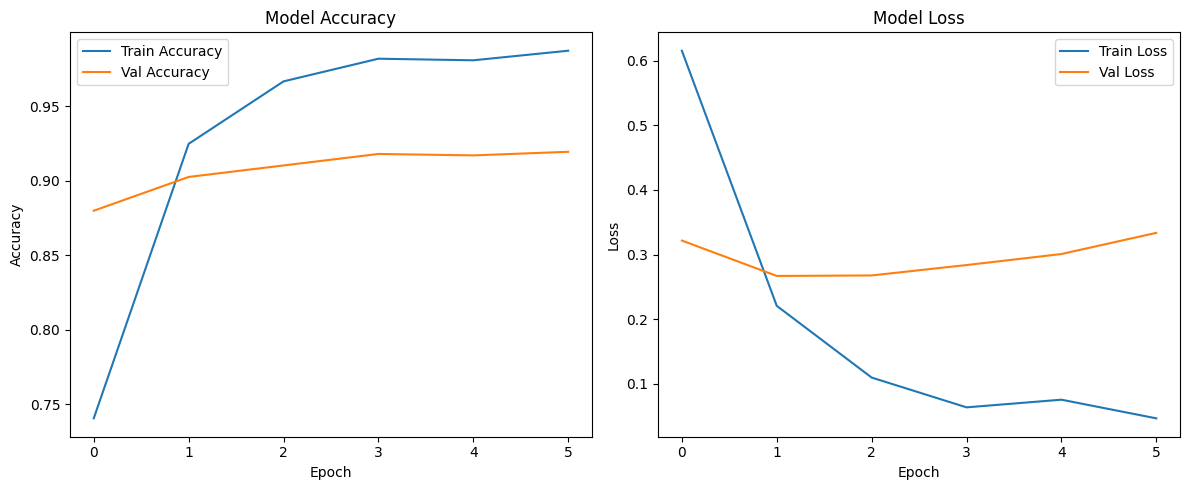

✅ Model saved as 'bi-lstm_religious_model.h5'
✅ Tokenizer saved as 'bi-lstm_tokenizer.pkl'


In [13]:
# Core libraries
import pandas as pd
import numpy as np
import pickle

# TensorFlow / Keras
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, Dropout, Dense
from tensorflow.keras.utils import to_categorical

# Train–test split
from sklearn.model_selection import train_test_split

# Evaluation metrics
from sklearn.metrics import classification_report, confusion_matrix

# Plotting
import matplotlib.pyplot as plt
import seaborn as sns

# ✅ Step 3: Load dataset
file_path = "/content/drive/MyDrive/Research Paper/Data Preprocessing/Cleaned_Labeled_Religious_Comments_Numeric_2.0.csv"
df = pd.read_csv(file_path)

# ✅ Step 5: Preprocess
texts = df['comment'].astype(str).values
labels = df['label_numeric'].values  # 0 = Not Religious, 1 = Religious, 2 = Harassment

from tensorflow.keras.utils import to_categorical
labels_cat = to_categorical(labels, num_classes=3)

# ✅ Step 6: Tokenize and pad
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

vocab_size = 12000
max_length = 100

tokenizer = Tokenizer(num_words=vocab_size, oov_token='<OOV>')
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)
padded = pad_sequences(sequences, maxlen=max_length, padding='post')

# ✅ Step 7: Train/Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(padded, labels_cat, test_size=0.2, random_state=42)

# ✅ Step 8: Bi-LSTM Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, Dropout, Dense

model = Sequential([
    Embedding(vocab_size, 128, input_length=max_length),
    Bidirectional(LSTM(64, return_sequences=False)),
    Dropout(0.4),
    Dense(64, activation='relu'),
    Dense(3, activation='softmax')  # for 3 classes
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.build(input_shape=(None, max_length))
model.summary()

# ✅ Step 9: Train
history = model.fit(X_train, y_train, epochs=6, batch_size=128, validation_split=0.1)

# ✅ Step 10: Evaluation
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = np.argmax(y_test, axis=1)

print("\nClassification Report:\n")
print(classification_report(y_true, y_pred, target_names=['Not Religious', 'Religious', 'Harassment']))

# ✅ Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Not Religious', 'Religious', 'Harassment'],
            yticklabels=['Not Religious', 'Religious', 'Harassment'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# ✅ Step 11: Plot history
plt.figure(figsize=(12,5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

# ✅ Step 12: Save model and tokenizer
import pickle
model.save('/content/drive/MyDrive/Research Paper/Models/Deep Learning Models/bi-lstm_religious_model.h5')

with open('/content/drive/MyDrive/Research Paper/Models/Deep Learning Models/bi-lstm_tokenizer.pkl', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

print("✅ Model saved as 'bi-lstm_religious_model.h5'")
print("✅ Tokenizer saved as 'bi-lstm_tokenizer.pkl'")


# RNN Model

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_13 (Embedding)        │ (None, 100, 128)       │     1,536,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_1 (SimpleRNN)        │ (None, 64)             │        12,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 3)              │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,552,707 (5.92 MB)

 Trainable params: 1,552,707 (5.92 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/6
146/146 ━━━━━━━━━━━━━━━━━━━━ 14s 82ms/step - accuracy: 0.5446 - loss: 0.9550 - val_accuracy: 0.6694 - val_loss: 0.7132
Epoch 2/6
146/146 ━━━━━━━━━━━━━━━━━━━━ 20s 76ms/step - accuracy: 0.7542 - loss: 0.6144 - val_accuracy: 0.7331 - val_loss: 0.6535
Epoch 3/6
146/146 ━━━━━━━━━━━━━━━━━━━━ 22s 86ms/step - accuracy: 0.8347 - loss: 0.4798 - val_accuracy: 0.7558 - val_loss: 0.6525
Epoch 4/6
146/146 ━━━━━━━━━━━━━━━━━━━━ 18s 72ms/step - accuracy: 0.8855 - loss: 0.3593 - val_accuracy: 0.7558 - val_loss: 0.6421
Epoch 5/6
146/146 ━━━━━━━━━━━━━━━━━━━━ 22s 82ms/step - accuracy: 0.8889 - loss: 0.3455 - val_accuracy: 0.7770 - val_loss: 0.6610
Epoch 6/6
146/146 ━━━━━━━━━━━━━━━━━━━━ 20s 80ms/step - accuracy: 0.9125 - loss: 0.2912 - val_accuracy: 0.7881 - val_loss: 0.6478
162/162 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step

RNN Classification Report:

               precision    recall  f1-score   support

Not Religious       0.83      0.90      0.86      2649
    Religious       0.62      0.63      0.62 

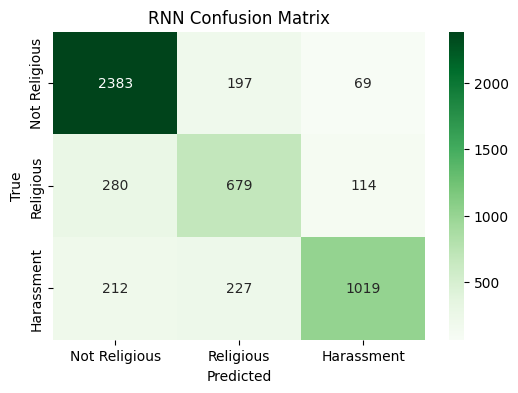

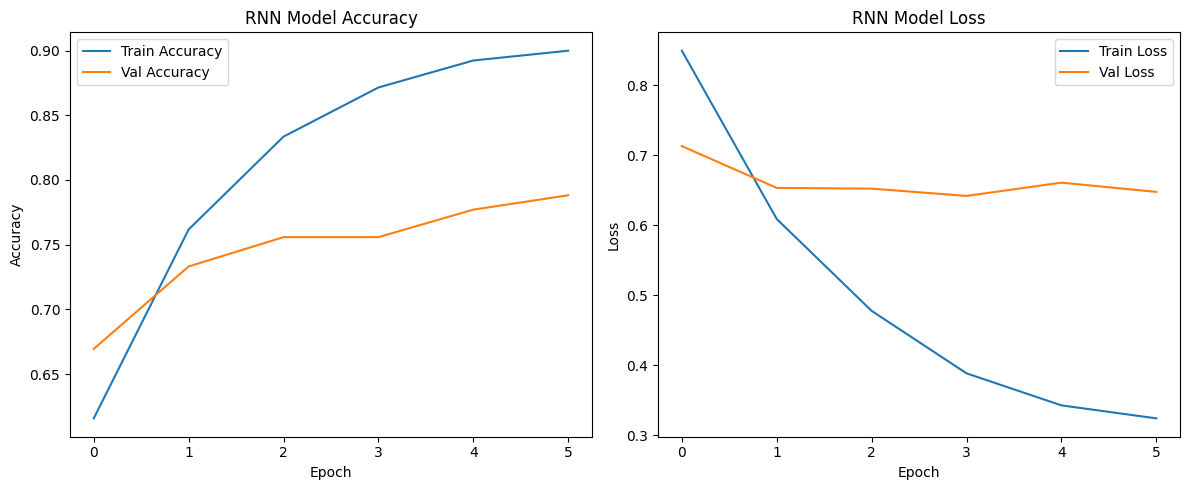

✅ RNN model saved as 'rnn_religious_model.h5'
✅ Tokenizer saved as 'rnn_tokenizer.pkl'


In [14]:
# Core libraries
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
import seaborn as sns

# TensorFlow / Keras
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dropout, Dense
from tensorflow.keras.utils import to_categorical

# Sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

# ✅ Step 1: Load Dataset
file_path = "/content/drive/MyDrive/Research Paper/Data Preprocessing/Cleaned_Labeled_Religious_Comments_Numeric_2.0.csv"
df = pd.read_csv(file_path)

# ✅ Step 2: Prepare Text and Labels
texts = df['comment'].astype(str).values
labels = df['label_numeric'].values  # 0 = Not Religious, 1 = Religious, 2 = Harassment
labels_cat = to_categorical(labels, num_classes=3)

# ✅ Step 3: Tokenization and Padding
vocab_size = 12000
max_length = 100

tokenizer = Tokenizer(num_words=vocab_size, oov_token='<OOV>')
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)
padded = pad_sequences(sequences, maxlen=max_length, padding='post')

# ✅ Step 4: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(padded, labels_cat, test_size=0.2, random_state=42)

# ✅ Step 5: Build RNN Model
rnn_model = Sequential([
    Embedding(input_dim=vocab_size, output_dim=128, input_length=max_length),
    SimpleRNN(64, return_sequences=False),
    Dropout(0.4),
    Dense(64, activation='relu'),
    Dense(3, activation='softmax')
])

rnn_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
rnn_model.build(input_shape=(None, max_length))
rnn_model.summary()

# ✅ Step 6: Train Model
rnn_history = rnn_model.fit(X_train, y_train, epochs=6, batch_size=128, validation_split=0.1)

# ✅ Step 7: Evaluation
y_pred_probs_rnn = rnn_model.predict(X_test)
y_pred_rnn = np.argmax(y_pred_probs_rnn, axis=1)
y_true_rnn = np.argmax(y_test, axis=1)

print("\nRNN Classification Report:\n")
print(classification_report(y_true_rnn, y_pred_rnn, target_names=['Not Religious', 'Religious', 'Harassment']))

# ✅ Confusion Matrix
cm_rnn = confusion_matrix(y_true_rnn, y_pred_rnn)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_rnn, annot=True, fmt='d', cmap='Greens',
            xticklabels=['Not Religious', 'Religious', 'Harassment'],
            yticklabels=['Not Religious', 'Religious', 'Harassment'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('RNN Confusion Matrix')
plt.show()

# ✅ Step 8: Plot Training History
plt.figure(figsize=(12,5))
plt.subplot(1, 2, 1)
plt.plot(rnn_history.history['accuracy'], label='Train Accuracy')
plt.plot(rnn_history.history['val_accuracy'], label='Val Accuracy')
plt.title('RNN Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(rnn_history.history['loss'], label='Train Loss')
plt.plot(rnn_history.history['val_loss'], label='Val Loss')
plt.title('RNN Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

# ✅ Step 9: Save Model and Tokenizer
rnn_model.save('/content/drive/MyDrive/Research Paper/Models/Deep Learning Models/rnn_religious_model.h5')
with open('/content/drive/MyDrive/Research Paper/Models/Deep Learning Models/rnn_tokenizer.pkl', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

print("✅ RNN model saved as 'rnn_religious_model.h5'")
print("✅ Tokenizer saved as 'rnn_tokenizer.pkl'")
